In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [20]:
import pandas as pd
from google.colab import files
uploaded = files.upload()   # upload CSV File

Saving Dentistry Dataset.csv to Dentistry Dataset (1).csv


In [21]:
df=pd.read_csv("Dentistry Dataset.csv")      #load dataset

In [22]:
df.head() #display few rows

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [23]:
df.isnull().sum()   #finding some missing values

,0
Sl No,0
Sample ID,1100
Age,0
Gender,0
inter canine distance intraoral,0
intercanine distance casts,0
right canine width intraoral,0
right canine width casts,0
left canine width intraoral,0
left canine width casts,0


In [24]:
df = df.drop(['Sample ID','Sl No'], axis=1)  #drop column


In [25]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [26]:
df.info()      #to show information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [27]:
# Manual mapping (alternative)
df['Gender'] =df['Gender'].replace({'Male': 1, 'Female': 0})


<ipython-input-27-cc83b986cd66>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] =df['Gender'].replace({'Male': 1, 'Female': 0})


In [28]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [29]:
X=df.drop(["Gender"],axis=1)

In [30]:
Y=df["Gender"]

In [31]:
# Normalize X using Normalizer
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)


In [32]:
print(X_normalized)

[[0.53936387 0.56318578 0.56296104 ... 0.00543859 0.00543859 0.00541611]
 [0.49575982 0.58094037 0.58116571 ... 0.00534069 0.00556603 0.00556603]
 [0.53997057 0.55945646 0.55945646 ... 0.00582229 0.00619792 0.00619792]
 ...
 [0.56255031 0.54544878 0.54544878 ... 0.00612055 0.00612055 0.00612055]
 [0.48779774 0.57769189 0.57769189 ... 0.00613231 0.006202   0.006202  ]
 [0.52715664 0.56176562 0.56176562 ... 0.00593624 0.00632588 0.00632588]]


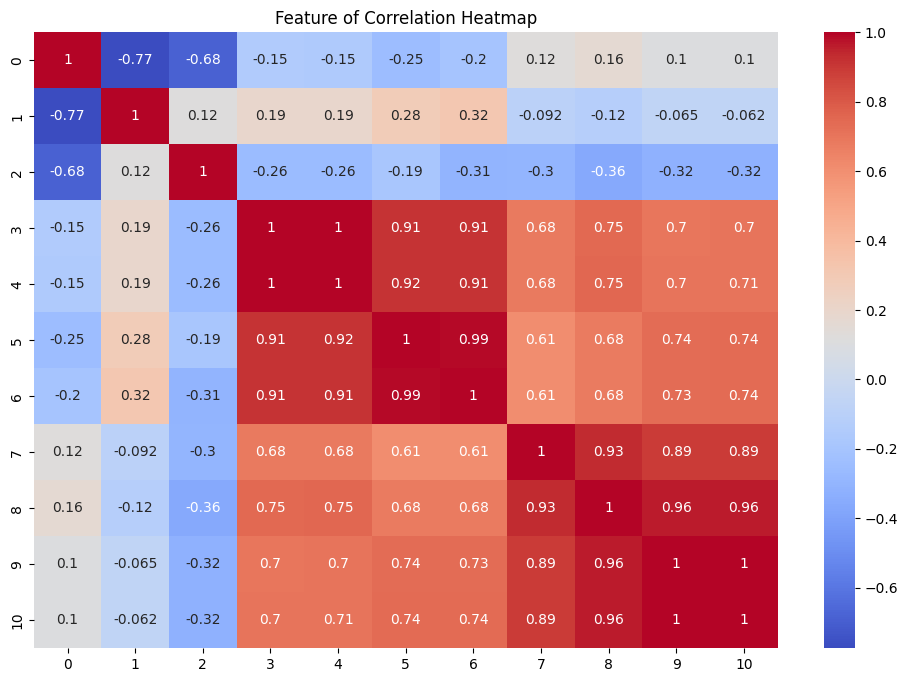

In [33]:

plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_normalized).corr(),annot=True, cmap='coolwarm')
plt.title("Feature of Correlation Heatmap")
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.3, random_state=42)


In [35]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
print(lr_model.score(X_train, Y_train))
print(lr_model.score(X_test, Y_test))

0.6285714285714286
0.6515151515151515


In [37]:
dt_model = DecisionTreeClassifier( min_samples_split=18,min_samples_leaf=16)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=16, min_samples_split=18)

In [38]:
print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_test, Y_test))

0.8792207792207792
0.8272727272727273


In [39]:
rf_model = RandomForestClassifier(max_depth=16,min_samples_split=16, min_samples_leaf=12,n_estimators=100,random_state=52)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=12, min_samples_split=16,
                       random_state=52)

In [40]:
print(rf_model.score(X_train, Y_train))
print(rf_model.score(X_test, Y_test))

0.9168831168831169
0.8272727272727273


In [41]:
xgb_model = XGBClassifier(max_depth=13, min_child_weight=13, subsample=0.5, gamma=0.5 )
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
print(xgb_model.score(X_train, Y_train))
print(xgb_model.score(X_test, Y_test))

0.8753246753246753
0.796969696969697


In [43]:
# from the above models i am taking  this three models

In [44]:
#confusion metrics for XGB
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [45]:
pred_xgb=xgb_model.predict(X_test)

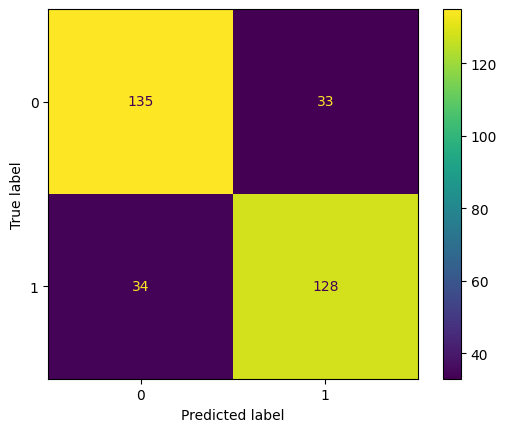

In [46]:
con_f1=ConfusionMatrixDisplay(confusion_matrix(pred_xgb,Y_test))
con_f1.plot()

In [47]:
TP=129
TN= 135
FP=32
FN=34

Accurancy=(TP + TN) / (TP + TN + FP + FN)
Accurancy

0.8

In [48]:
Precision=TP / (TP + FP)
Precision

0.8012422360248447

In [49]:
Recall=TP / (TP + FN)
Recall

0.7914110429447853

In [50]:
F1score= 2 * (Precision * Recall) / (Precision + Recall)
F1score

0.7962962962962963

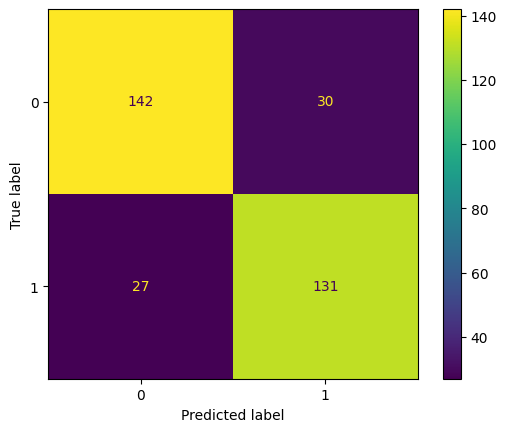

In [51]:
# #confusion metrics for random forest

pred_rf=rf_model.predict(X_test)
con_f2=ConfusionMatrixDisplay(confusion_matrix(pred_rf,Y_test))
con_f2.plot()

In [52]:
TP1=133
TN1= 145
FP1=28
FN1=24

Accurancy1=(TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)
Accurancy1

0.8424242424242424

In [53]:
Precision1=TP1/ (TP1 + FP1)
Precision

0.8012422360248447

In [54]:
Recall1= TP1 / (TP1 + FN1)
Recall1

0.8471337579617835

In [55]:
F1score1= 2 * (Precision * Recall) / (Precision + Recall)
F1score1

0.7962962962962963

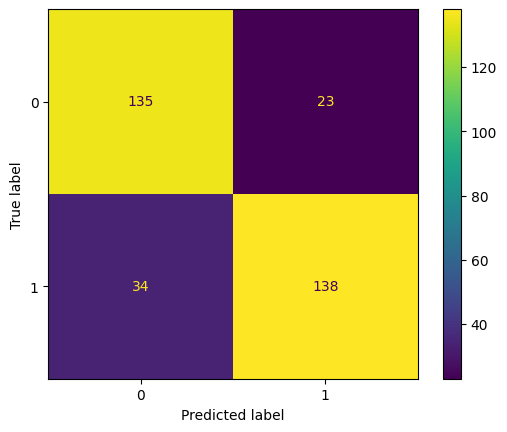

In [56]:
##confusion metrics for decision tree

pred_dt=dt_model.predict(X_test)
con_f2=ConfusionMatrixDisplay(confusion_matrix(pred_dt,Y_test))
con_f2.plot()

In [57]:
TP2=138
TN2= 135
FP2=23
FN2=34

Accuracy2=(TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
Accuracy2

0.8272727272727273

In [58]:
Precision2=TP2/ (TP2 + FP2)
Precision2

0.8571428571428571

In [59]:
Recall2=TP2 / (TP2 + FN2)
Recall2

0.8023255813953488

In [60]:
F1score2= 2 * (Precision * Recall) / (Precision + Recall)
F1score2

0.7962962962962963